<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/09_Enumeraci%C3%B3n_Reglas_de_transformaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Enumeración de bibliotecas químicas usando reglas de transformación**

---

Elaboró: Fernanda I. Saldivar González/      Contacto: fer.saldivarg@gmail.com



Objetivos:
---
*  Adquirir competencias en el empleo de SMARTS y SMIRKS para codificar información presente en la literatura científica sobre transformaciones químicas.
* Ilustrar la enumeración de bibliotecas químicas virtuales mediante un enfoque basado en transformaciones químicas.

#Introducción
---
Un enfoque que puede ayudar a explor la química en torno a los primeros *hits* identificados en un proceso de diseño de fármacos es mediante el uso de reglas de transformación. Este enfoque puede ayudar  a superar problemas con las propiedades de los compuestos; e identificar oportunidades para romper patentes mediante la expansión de la química en torno a estos primeros compuestos.

Algunas reglas de transformación en química farmacéutica pueden estar asociadas con mejorar los siguientes parámetros:

* Propiedades moleculares (forma y conformación, MW, Fsp3, etc.)
* Parámetros fisicoquímicos (lipofilia, solubilidad acuosa, etc.)
* Parámetros farmacológicos (potencia *in vitro*, selectividad frente a isoformas, eficacia *in vivo*, etc.)
* Parámetros ADME (estabilidad metabólica, inhibición de CYP450, unión a proteínas plasmáticas (PPB), etc.)
* Parámetros de seguridad y toxicidad (formación de metabolitos reactivos, hepatotoxicidad, mutagenicidad, etc.)
* Otros parámetros (diversidad estructural, bioisóstero)

Una ventaja de un enfoque basado en reglas de transformación es que las estructuras generadas tienden a ser más relevantes, debido a que las transformaciones se basan en precedentes históricos; sin embargo, la diversidad química que se puede explorar puede ser más limitada que un enfoque *de novo*, ya que está restringida por la biblioteca de transformaciones aplicadas.
No hay garantía de que puedan sintetizarse fácilmente a partir de los reactivos disponibles.



# Ejercicios:


Construir SMIRKS que describan cambios isostéricos del grupo fenil y aplicarlos a un set de compuestos para generar nuevas estructuras químicas. Ejemplos de estas transformaciones se encuentran descritas en la Figura 1. Para saber más de los cambios isostéricos del grupo fenil consulte la siguiente referencia: [*J. Med. Chem.* 2021, 64, 19, 14046–14128](https://pubs.acs.org/doi/10.1021/acs.jmedchem.1c01215)

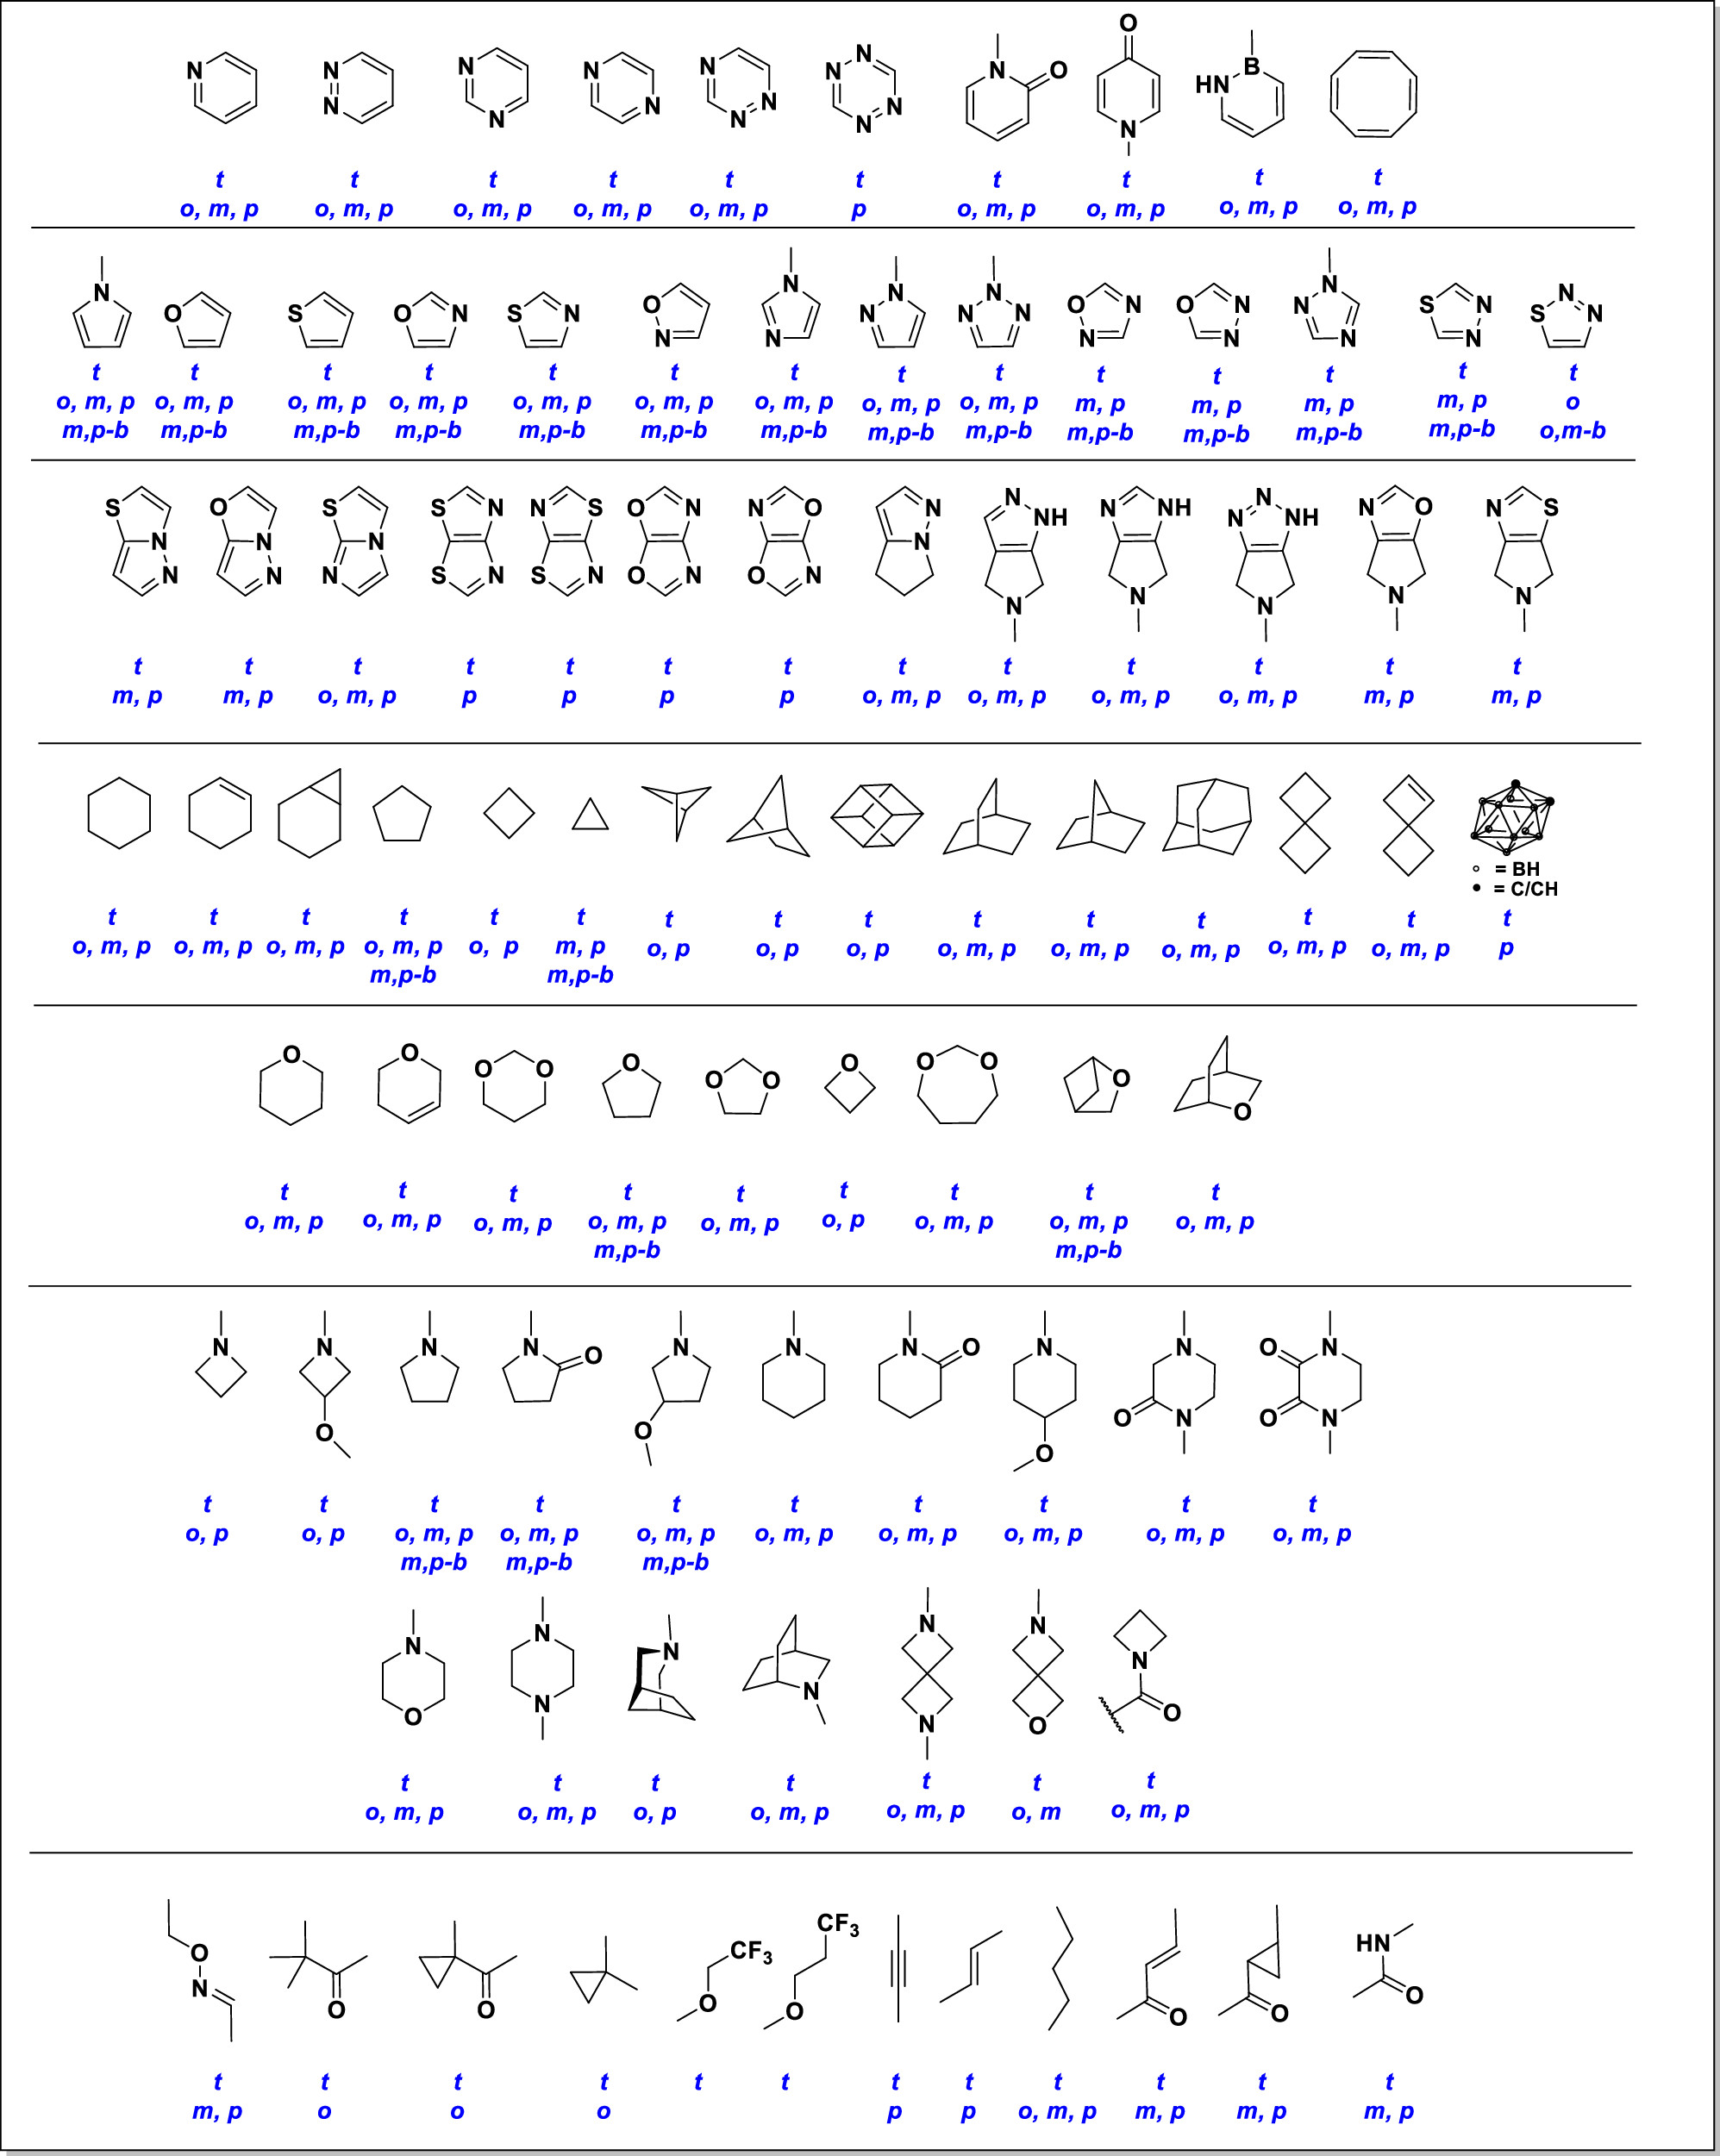

Figura 1. Cambios isostéicos del grupo fenilo.

1. Instalar paqueterias y funciones a utilizar

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 52.6 MB/s eta 0:00:00


In [ ]:
!pip install faerun-notebook==0.1.5b0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.0/535.0 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for faerun-notebook: filename=faerun_notebook-0.1.5b0-py2.py3-none-any.whl size=470156 sha256=4f5cc43610e9354849d37f26bbd349575bc63cc49ed3a7dfb3e20f82553ad3a3
  Stored in directory: /root/.cache/pip/wheels/92/d6/0e/c24e55ea7bb33143c61a11fb03b609cff740f24875d0bf4fad
Successfully built faerun-notebook


In [ ]:
import pandas as pd
import rdkit as rk
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
import ipywidgets as widgets
from faerun_notebook import SmilesDrawer
from google.colab import output
output.enable_custom_widget_manager()

1. Construir SMARTS específicos para cada transformación

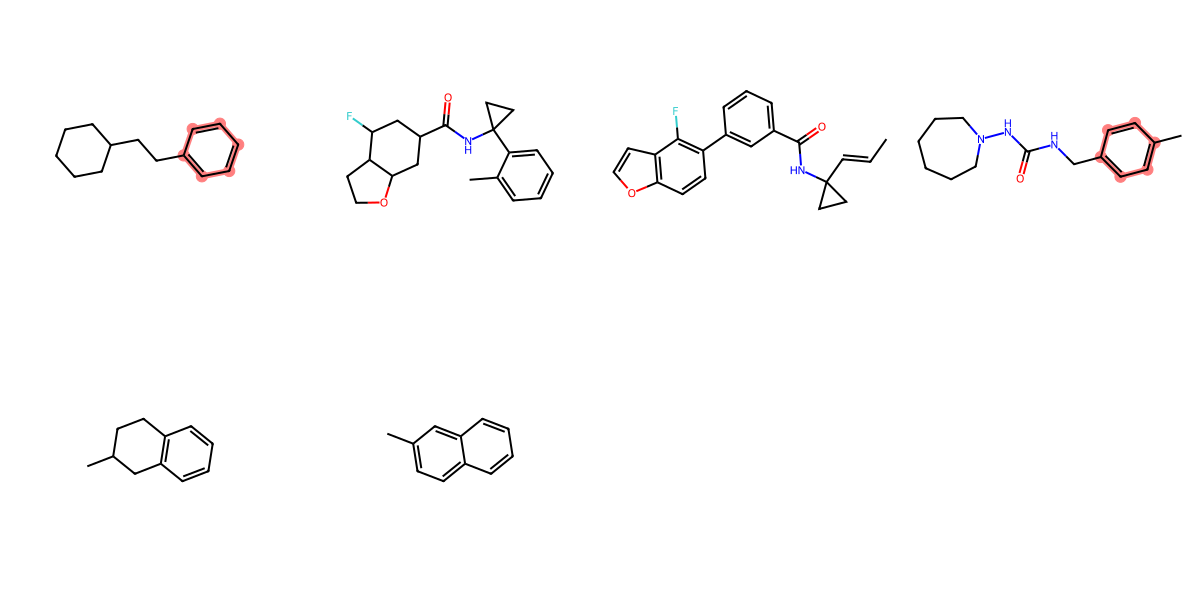

In [ ]:
#Check SMARTS
smiles_list2 = ['C(CC1=CC=CC=C1)C1CCCCC1', 'CC1=CC=CC=C1C1(CC1)NC(=O)C1CC2OCCC2C(F)C1', 'C\C=C\C1(CC1)NC(=O)C1=CC=CC(=C1)C1=C(F)C2=C(OC=C2)C=C1','CC1=CC=C(CNC(=O)NN2CCCCCC2)C=C1', 'CC1CCC2=C(C1)C=CC=C2','CC1=CC=C2C=CC=CC2=C1' ]
#'CCCC1=CC(CC)=CC(C)=C1'
mol_list = []
for smiles in smiles_list2:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)



pattern2 = Chem.MolFromSmarts ('[c;x2:1]1[c;x2D2:6][c;x2D2:5][c;x2:4][c;x2D2:3][c;x2D2:2]1') #Terminal y para

#pattern2 = Chem.MolFromSmarts ('[c;D2]1[c;x2:2][c;x2:3][c;x2:4][c;x2:5][c;x2:1]1')
img2 = Draw.MolsToGridImage( mol_list, subImgSize=(300,300), molsPerRow=4, highlightAtomLists=[mol.GetSubstructMatch(pattern2) for mol in mol_list], useSVG=True )
img2


Note que en la Figura 1, las transformaciones descritas para el grupo fenil pueden tener ciertas especificaciones y dependen del patrón de sustitución.
Aqui se muestran ejemplos de SMARTS que identifican algunas de estas especificaciones:

**Phenyl_meta:** [*:7]-[c;x2:1]1[c;x2D2:6][c;x2D2:5][c;x2D2:4][c;x2:3](-[*:8])[c;x2D2:2]1

**Phenyl_terminal_para**: [c;x2:1]1[c;x2D2:6][c;x2D2:5][c;x2:4][c;x2D2:3][c;x2D2:2]1

**Phenyl_terminal_orto:** [c;x2:1]1[c;x2:2][c;x2D2:3][c;x2D2][c;x2D2:4][c;x2D2:5]1
**Phenyl_terminal_orto_para:** [c;x2]1[c;x2:1][c;x2][c;x2:2][c;x2][c;x2]1


Fenil (t, o, m, p) a Piridazina

In [ ]:
SmilesDrawer(value="C1=CC=CC=C1>>c1ccnnc1 |c:0,2,4|", theme='matrix', background="#000000", options={'scale': 1.5, 'bondThickness': 2.5})

SmilesDrawer(background='#000000', options={'scale': 1.5, 'bondThickness': 2.5}, theme='matrix', value='C1=CC=…

3. Definir función para generar los nuevos compuestos

Number of unique product sets: 11


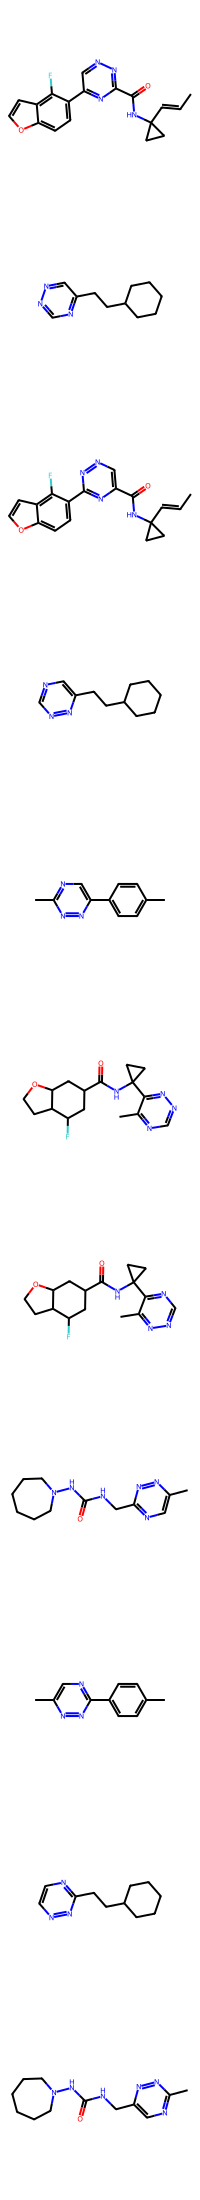

In [ ]:
from itertools import chain


def to_smiles(mol_tuple):
    return tuple(Chem.MolToSmiles(mol) for mol in mol_tuple)

def from_smiles(smiles_tuple):
    return tuple(Chem.MolFromSmiles(smiles) for smiles in smiles_tuple)

phenyl_to_pyridazine_smarts = '[c;D2:4]1[c;x2:5][c;x2:6][c;D2:1][c;x2:2][c;D2:3]1>>[c;x2:6]1[c;x2:5][n:4][n:3][c;x2:2][n;x2:1]1'
phenyl_to_pyridazine = AllChem.ReactionFromSmarts(phenyl_to_pyridazine_smarts)

#
all_products_tuples = [phenyl_to_pyridazine.RunReactants((mol, )) for mol in mol_list]
all_products = chain.from_iterable(all_products_tuples)
all_products_smiles = [to_smiles(mol_tuple) for mol_tuple in all_products]
all_products_unique = [from_smiles(smiles_tuple) for smiles_tuple in set(all_products_smiles)]
nProductSets = len(all_products_unique)
print("Number of unique product sets:",nProductSets)
# draw each product set on its own line
prod_tpl = tuple(chain(*all_products_unique))
img3= Draw.MolsToGridImage(prod_tpl,molsPerRow=phenyl_to_pyridazine.GetNumProductTemplates())
img3

Phenyl to trifluoroethoxy

In [ ]:
SmilesDrawer(value= "*C1=CC=CC=C1>>FC(F)(F)CCO* |c:3,5,t:1|", theme='matrix', background="#000000", options={'scale': 1.5, 'bondThickness': 2.5})

SmilesDrawer(background='#000000', options={'scale': 1.5, 'bondThickness': 2.5}, theme='matrix', value='*C1=CC…

Number of unique product sets: 1


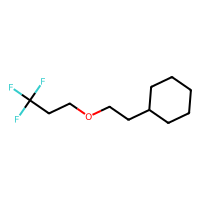

In [ ]:
from itertools import chain


def to_smiles(mol_tuple):
    return tuple(Chem.MolToSmiles(mol) for mol in mol_tuple)

def from_smiles(smiles_tuple):
    return tuple(Chem.MolFromSmiles(smiles) for smiles in smiles_tuple)

phenyl_to_OCCCF3_smarts = '[*:2]-[c;x2D3:1]1[c;x2D2][c;x2D2][c;x2D2][c;x2D2][c;x2D2]1>>FC(F)(F)[#6]-[#6]-[#8:1]-[*:2] |rb:1:2,2:2,3:2,4:2,5:2,6:2|'
phenyl_to_OCCCF3 = AllChem.ReactionFromSmarts(phenyl_to_OCCCF3_smarts)

#
all_products_tuples = [phenyl_to_OCCCF3.RunReactants((mol, )) for mol in mol_list]
all_products = chain.from_iterable(all_products_tuples)
all_products_smiles = [to_smiles(mol_tuple) for mol_tuple in all_products]
all_products_unique = [from_smiles(smiles_tuple) for smiles_tuple in set(all_products_smiles)]
nProductSets = len(all_products_unique)
print("Number of unique product sets:",nProductSets)
# draw each product set on its own line
prod_tpl = tuple(chain(*all_products_unique))
img3=Draw.MolsToGridImage(prod_tpl,molsPerRow=phenyl_to_OCCCF3.GetNumProductTemplates())
img3

#Para saber más:

* Rarey, M., Nicklaus, M. C., and Warr, W. (2022). S[pecial Issue on Reaction Informatics and Chemical Space.](https://pubs.acs.org/doi/10.1021/acs.jcim.2c00390) *J. Chem. Inf. Model.* 62:2009–2010.
* Saldívar-González FI, Navarrete-Vázquez G,  Medina-Franco JL. (2023) [Design of a multi-target focused library for antidiabetic targets using a comprehensive set of chemical transformation rules.](https://www.frontiersin.org/articles/10.3389/fphar.2023.1276444/full) *Front. Pharmacol.* 14, 1276444.
* Subbaiah, M. A. M., and Meanwell, N. A. (2021). [Bioisosteres of the Phenyl Ring: Recent Strategic Applications in Lead Optimization and Drug Design.](https://pubs.acs.org/doi/10.1021/acs.jmedchem.1c01215) *J. Med. Chem.* 64, 14046–14128.
* Yang T, Li Z, Chen Y, Feng D, Wang G, Fu Z, Ding X, Tan X, Zhao J, Luo X, Chen K, Jiang H, Zheng M. [DrugSpaceX: a large screenable and synthetically tractable database extending drug space.](https://academic.oup.com/nar/article/49/D1/D1170/5940503?login=false) *Nucleic Acids Res*. 8;49(D1):D1170-D1178.
